In [2]:
import os
from datetime import timedelta

import pyedflib
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [1]:
data_folder = r'/Users/julian/Developer/EEG Data/'
# data_folder = r'/data/datasets/'
data_path = os.path.join(data_folder, r'20240201_UNEEG_ForMayo/B52K3P3G/V5a')
file_path = os.path.join(data_path, 'B52K3P3G_01_0004245_20211008_01_EEGdata.edf')

NameError: name 'os' is not defined

In [4]:
edf = pyedflib.EdfReader(file_path)

start_date_time = datetime.datetime(edf.startdate_year, edf.startdate_month, edf.startdate_day, edf.starttime_hour, edf.starttime_minute, edf.starttime_second, edf.starttime_subsecond)
duration = datetime.timedelta(seconds=edf.file_duration)
end_date_time = start_date_time + duration

print(f'{start_date_time=}')
print(f'{duration=}')
print(f'{end_date_time=}')

edf.close()

start_date_time=datetime.datetime(2021, 10, 8, 21, 36, 25)
duration=datetime.timedelta(seconds=21619, microseconds=756550)
end_date_time=datetime.datetime(2021, 10, 9, 3, 36, 44, 756550)


n_samples=4475961
sample_freq_hz=207.0310546581987
duration_sec=21619.756550000002
duration= 6:00:19.756550 h
edf.datarecord_duration=0.99985


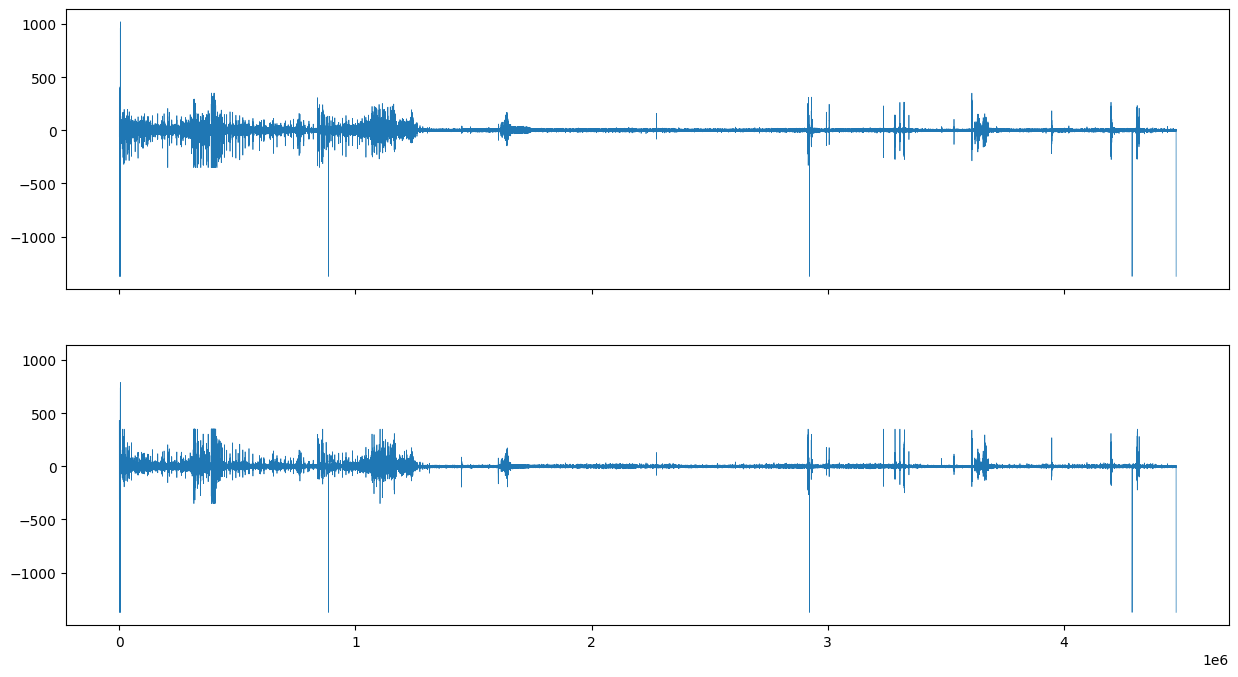

In [5]:
edf = pyedflib.EdfReader(file_path)

n_signals = edf.signals_in_file
assert edf.getNSamples()[0] == edf.getNSamples()[1], 'Number of samples is unequal for different channels'
n_samples = edf.getNSamples()[0]
print(f'n_samples={n_samples}')

assert edf.samplefrequency(0) == edf.samplefrequency(1), "Sampling Frequency isn't equal for both channels"
sampling_freq_hz = edf.samplefrequency(0)
print(f'{sampling_freq_hz=}')

duration_sec = n_samples / sampling_freq_hz
print(f'duration_sec={duration_sec}')
print(f'duration= {str(datetime.timedelta(seconds=duration_sec))} h')

print(f'{edf.datarecord_duration=}')

fig, ax = plt.subplots(nrows=n_signals, sharex=True, sharey=True, figsize=(15, 8))
for i in range(n_signals):
    ax[i].plot(edf.readSignal(i), linewidth=0.5)

edf.close()

In [6]:
del ax, duration, duration_sec, edf, end_date_time, start_date_time, fig, n_samples, n_signals, sampling_freq_hz

In [10]:
from pyedflib import highlevel

signals, signal_headers, header = highlevel.read_edf(file_path, ch_names=['EEG SQ_D-SQ_C', 'EEG SQ_P-SQ_C'])

local_time: str = header['annotations'][0][2]
local_time = local_time.removeprefix('LOCAL TIME = ')
print(f'{local_time=}')

local_time='UTC+02h'


In [12]:
# Cut a window of a specified size
sampling_freq_hz = signal_headers[0]['sample_frequency']

WINDOW_SIZE_SEC = 10.0
window_size_idx = round(WINDOW_SIZE_SEC * sampling_freq_hz)
print(f'{window_size_idx=}')

window_size_idx=2070


In [15]:
def time_to_index(start_time: datetime.datetime, cur_time: datetime.datetime, sampling_freq_hz: float) -> float:
    """Based on the specified date & time of day in a recording, calculate the index of that timestamp.
    Note: the index will be returned as a float so that the reverse conversion can be made accurately. If actually used to index, round it."""
    time_dif = cur_time - start_time
    return time_dif.total_seconds() * sampling_freq_hz

def index_to_time(start_time: datetime.datetime, index: int, sampling_freq_hz: float):
    """Based on the specified index in a recording, calculate the date & time of that index."""
    time_dif = datetime.timedelta(seconds=index / sampling_freq_hz)
    return start_time + time_dif


date1 = datetime.datetime(2025, 7, 29, 10, 30, 0)  # Example: July 29, 2025, 10:30:00
date2 = datetime.datetime(2025, 7, 29, 12, 0, 0)  # Example: July 29, 2025, 12:00:00

index = time_to_index(date1, date2, sampling_freq_hz)
print(f'time to index: {index}')
print(f'index to time: {index_to_time(date1, index, sampling_freq_hz)}')

time to index: 1117967.695154273
index to time: 2025-07-29 12:00:00
